In [1]:
import numpy as np 
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

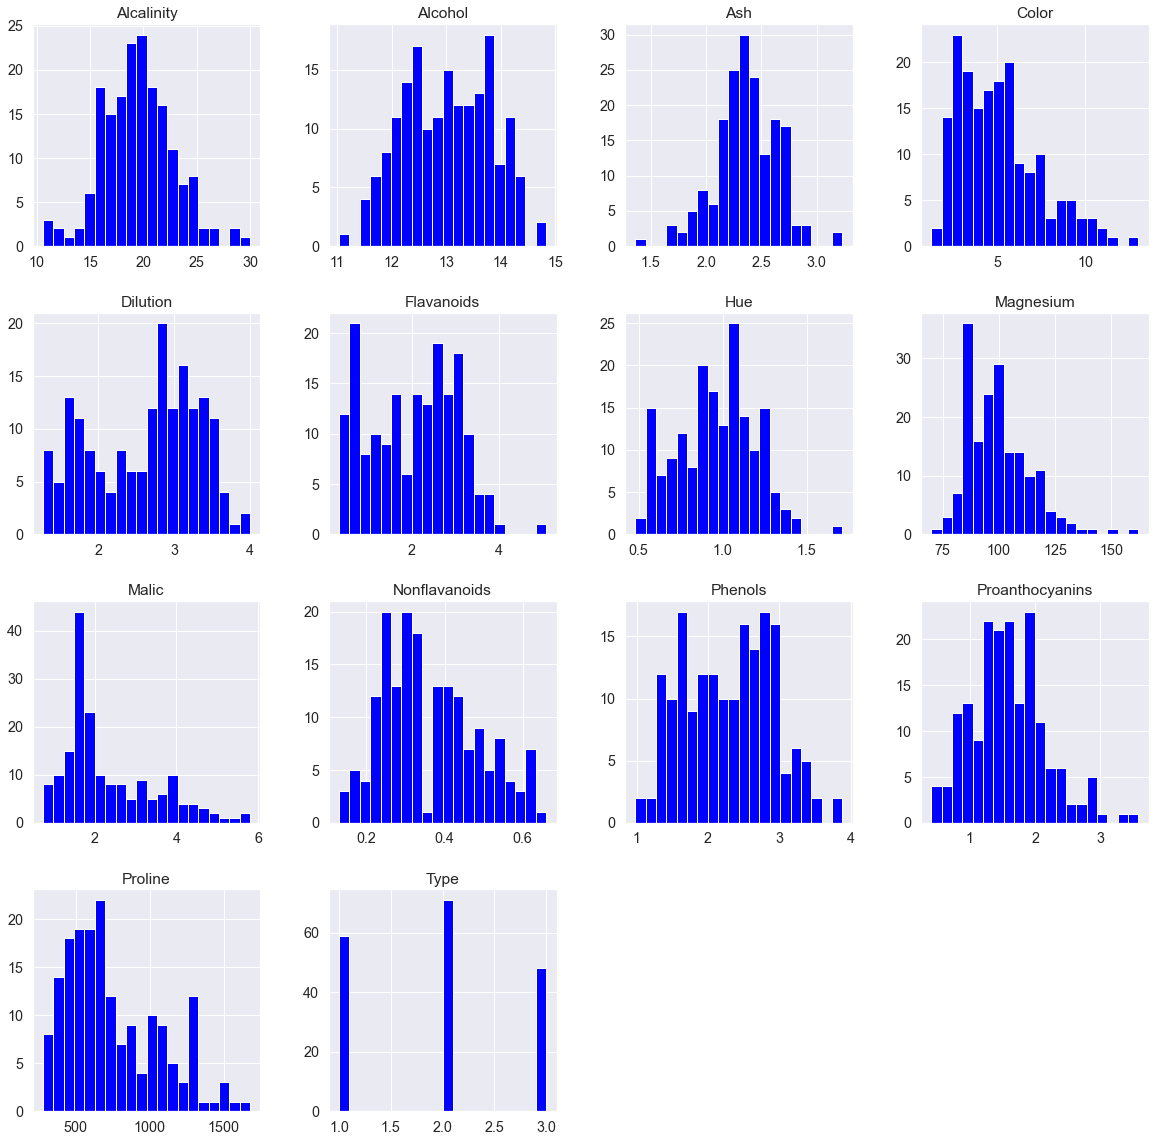

In [6]:
sns.set(font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=data.hist(bins=20,color='blue' )

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[data_scaled.columns]=scaler.fit_transform(data_scaled)

In [9]:
data_scaled

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.213944,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,-1.213944,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,-1.213944,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,-1.213944,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,-1.213944,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.373864,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,1.373864,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,1.373864,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [10]:
data_scaled.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-9.056426e-16,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.247442e-18,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-1.213944e+00,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-1.213944e+00,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,7.996036e-02,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,1.373864e+00,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,1.373864e+00,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


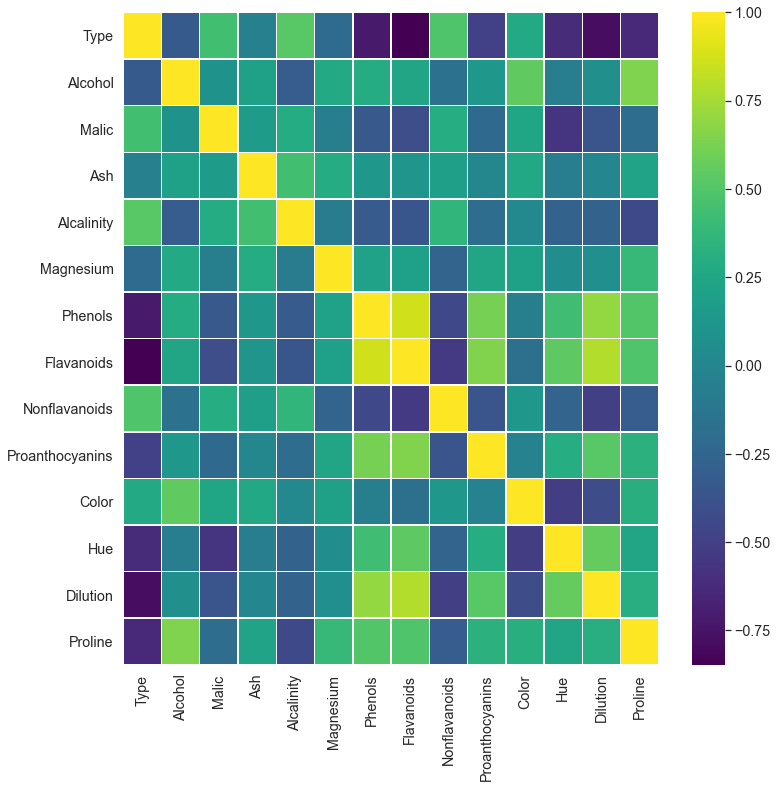

In [11]:
corr = data_scaled.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, linewidths=.5, cmap='viridis')

In [12]:
pca = PCA()
pca_data = pca.fit_transform(data_scaled)

In [13]:
pca.get_covariance()

array([[ 1.00564972, -0.3300763 ,  0.44024952, -0.04992369,  0.52078487,
        -0.21036119, -0.72322641, -0.85228566,  0.49187249, -0.50194977,
         0.26716852, -0.62085717, -0.79268286, -0.63729711],
       [-0.3300763 ,  1.00564972,  0.09493026,  0.21273976, -0.31198788,
         0.27232816,  0.29073446,  0.23815287, -0.15681042,  0.13747022,
         0.549451  , -0.07215255,  0.07275191,  0.64735687],
       [ 0.44024952,  0.09493026,  1.00564972,  0.16497228,  0.29013035,
        -0.05488343, -0.3370606 , -0.41332866,  0.29463237, -0.22199334,
         0.25039204, -0.56446685, -0.37079354, -0.19309537],
       [-0.04992369,  0.21273976,  0.16497228,  1.00564972,  0.44587209,
         0.28820583,  0.12970824,  0.11572743,  0.1872826 ,  0.00970647,
         0.2603499 , -0.07508874,  0.00393333,  0.22488969],
       [ 0.52078487, -0.31198788,  0.29013035,  0.44587209,  1.00564972,
        -0.0838039 , -0.32292752, -0.353355  ,  0.36396647, -0.19844168,
         0.01883781, -0.27

In [14]:
var = pca.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [18]:
var.shape

(14,)

In [21]:
pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=0eb165f30207b23724e0496f317ed0840ff827c9309d653b74b1134055ade4f6
  Stored in directory: c:\users\gkhat\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [23]:
import plotly.express as px
px.area(
    x=range(1, var.shape[0] + 1),
    y=var,
    labels={"x": "Principal Components", "y": "Explained Variance"}
)

In [25]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

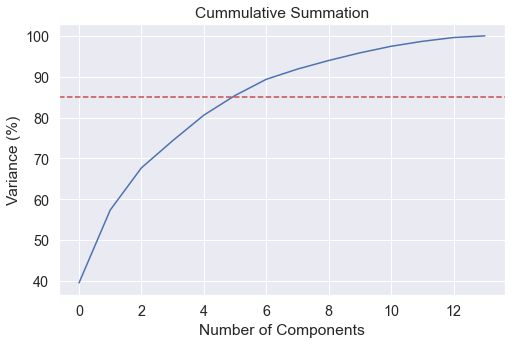

In [27]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize = (8,5))
plt.plot(var1)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Cummulative Summation')

# We want to preserve 95% of the variance so plot a horizontal line at 95% variance
plt.axhline(y=85, color='r', linestyle='--')
plt.show()

2 pc's explain about 65% of varience

In [30]:
pca2 = PCA(n_components = 3).fit(data_scaled)
pca_values = pca.fit_transform(data_scaled)

print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca2.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 67.71%


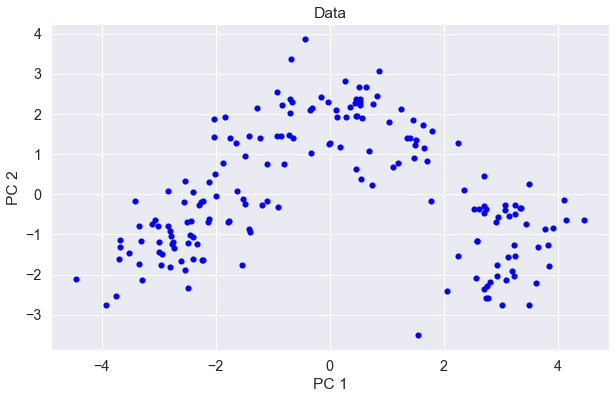

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(x=pca_values[:, 0], y=pca_values[:, 1], color='blue',lw=0.1)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Data')
plt.show()

### Applying clustering

Text(0, 0.5, 'wcss')

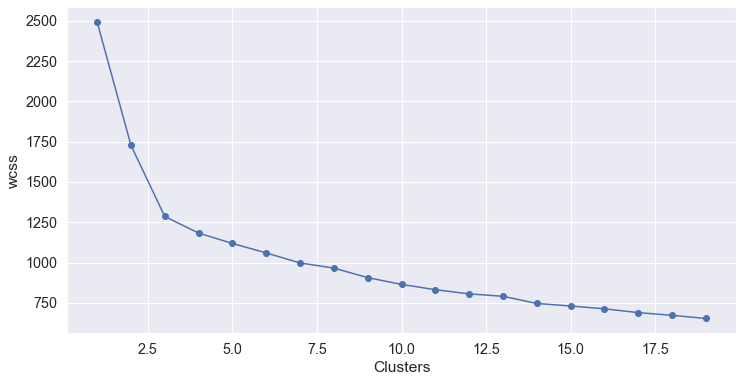

In [39]:
from sklearn.cluster import KMeans

wcss = []
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(pca_values)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
frame_scaled = pd.DataFrame({'Cluster':range(1,20), 'wcss':wcss})
plt.plot(frame_scaled['Cluster'], frame_scaled['wcss'], marker='o')
plt.xlabel("Clusters")
plt.ylabel("wcss")

In [40]:
kmeans = KMeans(n_clusters = 3,init='k-means++',random_state=9)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [41]:
frame = pd.DataFrame(data_scaled)
data['cluster'] = pred

data['cluster'].value_counts()

0    68
1    61
2    49
Name: cluster, dtype: int64

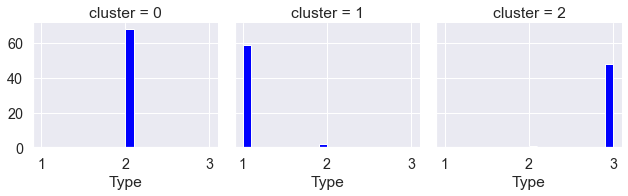

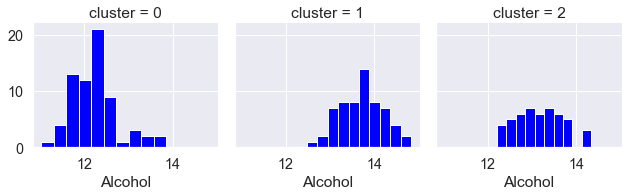

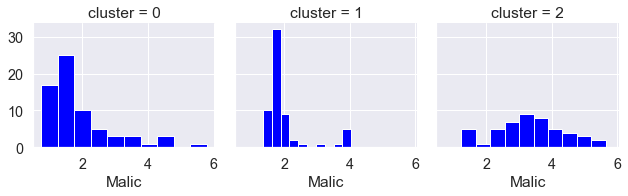

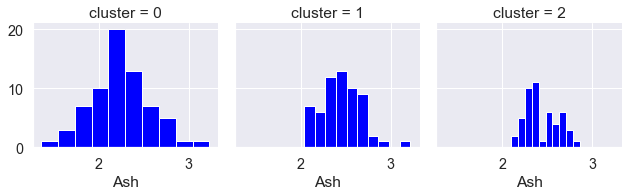

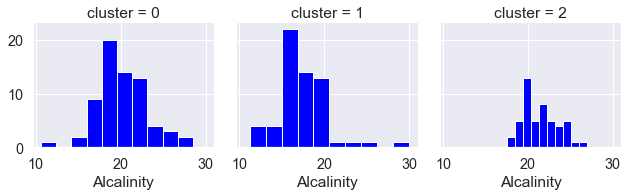

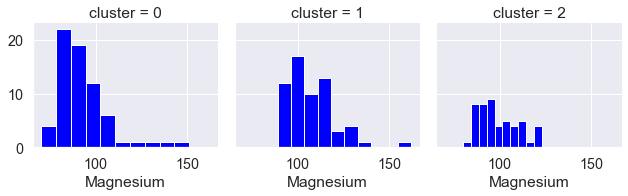

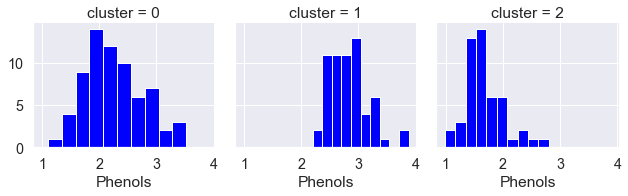

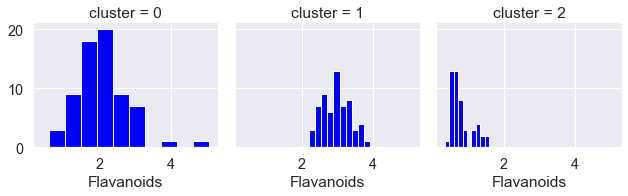

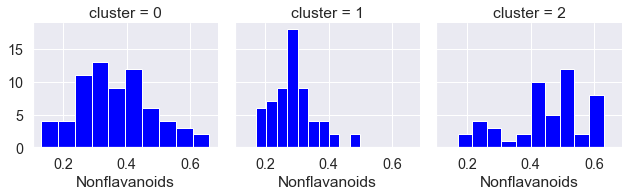

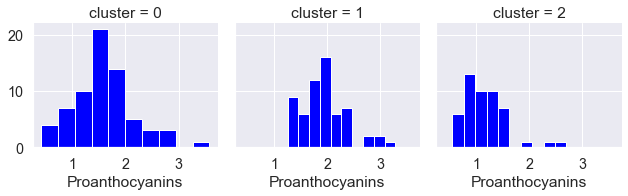

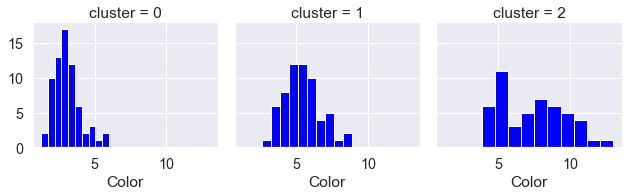

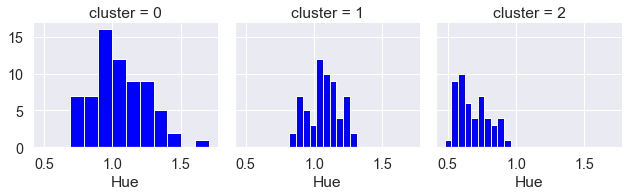

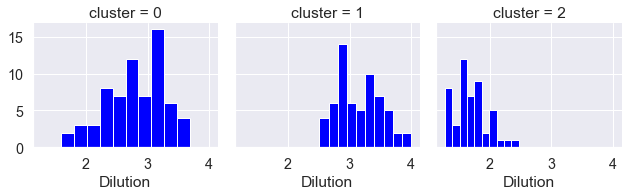

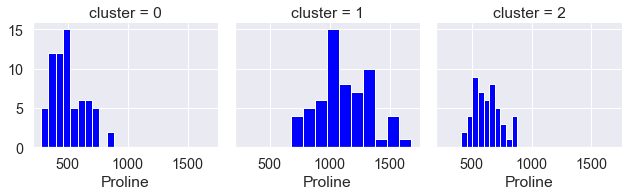

In [43]:
a=data.columns.tolist()
a[0:len(a)-1]

for cluster in a[0:len(a)-1]:
    grid= sns.FacetGrid(data, col='cluster')
    grid.map(plt.hist, cluster,color='blue')